# Human pose estimation with YoloV7

Unlike conventional Pose Estimation algorithms, **YOLOv7 pose is a single-stage multi-person keypoint detector**. It is similar to the bottom-up approach but heatmap free. It is an extension of the one-shot pose detector – YOLO-Pose. It has the best of both Top-down and Bottom-up approaches.
<br><br>
**YOLOv7 Pose is trained on the COCO dataset which has 17 landmark topologies**.<br>


<img src="https://learnopencv.com/wp-content/uploads/2022/10/coco-17-skeleton-topology.png" width="240">

## Importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install moviepy

In [3]:
pip install --upgrade torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
import sys
import torch
import time
import datetime

from torchvision import transforms
from PIL import Image
from moviepy.editor import *

%matplotlib inline

  if event.key is 'enter':



In [5]:
sys.version

'3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]'

In [6]:
print(datetime.datetime.today())

2024-11-14 17:11:35.768190


In [7]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 1. Cloning YoloV7 repo

In [8]:
YOLO_DIR = 'yolov7'

In [9]:
if not os.path.exists(YOLO_DIR):
    print("Starting to clone the YoloV7 repo\n")
    !git clone https://github.com/WongKinYiu/yolov7.git
    print("\nDone")

if os.path.exists(YOLO_DIR):
    print("\nDirectory is present:\n")
    !ls yolov7

Starting to clone the YoloV7 repo

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 22.71 MiB/s, done.
Resolving deltas: 100% (519/519), done.

Done

Directory is present:

cfg	detect.py  hubconf.py  models	  requirements.txt  tools	  utils
data	export.py  inference   paper	  scripts	    train_aux.py
deploy	figure	   LICENSE.md  README.md  test.py	    train.py


In [10]:
RESULTS_DIR = 'results'

if not os.path.exists(RESULTS_DIR):
    print("Creating the directory:", RESULTS_DIR)
    os.mkdir(RESULTS_DIR)
    print("Done")

Creating the directory: results
Done


## 2. YoloV7 models

Models:
https://github.com/WongKinYiu/yolov7/#performance

In [11]:
YOLOV7_MODEL = [
    "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt",
    "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt",
    "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7x.pt",
    "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6.pt",
    "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6.pt",
    "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-d6.pt",
    "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6e.pt",
    "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6-pose.pt",
]

In [12]:
print("List of YoloV7 models:\n")
YOLOV7_MODEL

List of YoloV7 models:



['https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt',
 'https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt',
 'https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7x.pt',
 'https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6.pt',
 'https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6.pt',
 'https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-d6.pt',
 'https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6e.pt',
 'https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6-pose.pt']

In [13]:
def get_yolov7_model(modelistid=1):
    """
    Download YoloV7 model from a yoloV7 model list
    """
    modelid = YOLOV7_MODEL[modelistid]

    if not os.path.exists(modelid):
        print("Downloading the model:",
              os.path.basename(modelid), "from:", modelid)
        urllib.request.urlretrieve(modelid,
                                   filename=os.path.basename(modelid))
        print("Done\n")
        !ls yolo*.pt -lh

    if os.path.exists(modelid):
        print("Downloaded model files:")
        !ls yolo*.pt -lh

## 3. Using YoloV7 models on images

In [14]:
os.chdir(YOLO_DIR)

In [15]:
from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [17]:
def image_view(imagefile, w=15, h=10):
    %matplotlib inline
    plt.figure(figsize=(w, h))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(cv2.imread(imagefile),
                            cv2.COLOR_BGR2RGB))

In [18]:
def loading_yolov7_model(yolomodel):
    print("Loading model:", yolomodel)
    model = torch.load(yolomodel, map_location=device)['model']
    model.float().eval()

    if torch.cuda.is_available():
        model.half().to(device)

    return model, yolomodel

In [19]:
def running_inference(image):
    image = letterbox(image, 960,
                      stride=64,
                      auto=True)[0]
    image = transforms.ToTensor()(image)

    if torch.cuda.is_available():
        image = image.half().to(device)

    image = image.unsqueeze(0)

    with torch.no_grad():
        output, _ = model(image)

    return output, image

In [20]:
def draw_keypoints(output, image, confidence=0.25, threshold=0.65):
    output = non_max_suppression_kpt(
        output,
        confidence,
        threshold,
        nc=model.yaml['nc'],
        nkpt=model.yaml['nkpt'],
        kpt_label=True)

    with torch.no_grad():
        output = output_to_keypoint(output)

    nimg = image[0].permute(1, 2, 0) * 255
    nimg = cv2.cvtColor(nimg.cpu().numpy().astype(np.uint8), cv2.COLOR_RGB2BGR)

    for idx in range(output.shape[0]):
        plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)

    return nimg

### 3.1 Using the tiny Yolov7 model

In [21]:
YOLOV7_MODEL[0]

'https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt'

In [22]:
get_yolov7_model(0)

Done

-rw-r--r-- 1 root root 13M Nov 14 17:11 yolov7-tiny.pt


In [23]:
YOLOV7MODEL = os.path.basename(YOLOV7_MODEL[0])

try:
    print("Loading the model...")
    model, yolomodel = loading_yolov7_model(yolomodel=YOLOV7MODEL)
    print("Using the", YOLOV7MODEL, "model")
    print("Done")

except:
    print("[Error] Cannot load the model", YOLOV7MODEL)

  model = torch.load(yolomodel, map_location=device)['model']



Loading the model...
Loading model: yolov7-tiny.pt
Using the yolov7-tiny.pt model
Done


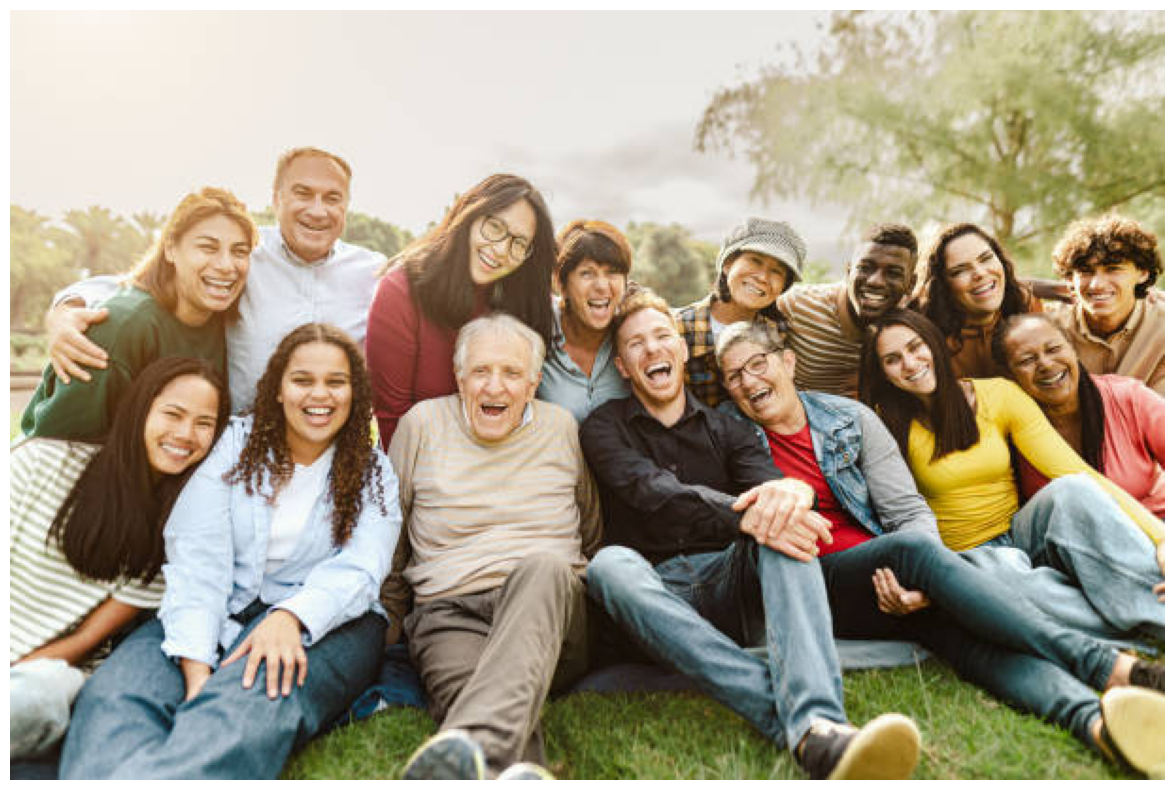

In [24]:
image_view("/content/drive/MyDrive/Colab Notebooks/MV/Project/1.jpg")

In [25]:
!python detect.py --weights ./yolov7-tiny.pt --conf 0.2 --img-size 640 --source "/content/drive/MyDrive/Colab Notebooks/MV/Project/1.jpg"

Namespace(weights=['./yolov7-tiny.pt'], source='/content/drive/MyDrive/Colab Notebooks/MV/Project/1.jpg', img_size=640, conf_thres=0.2, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.5.1+cu124 CPU

/content/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be lo

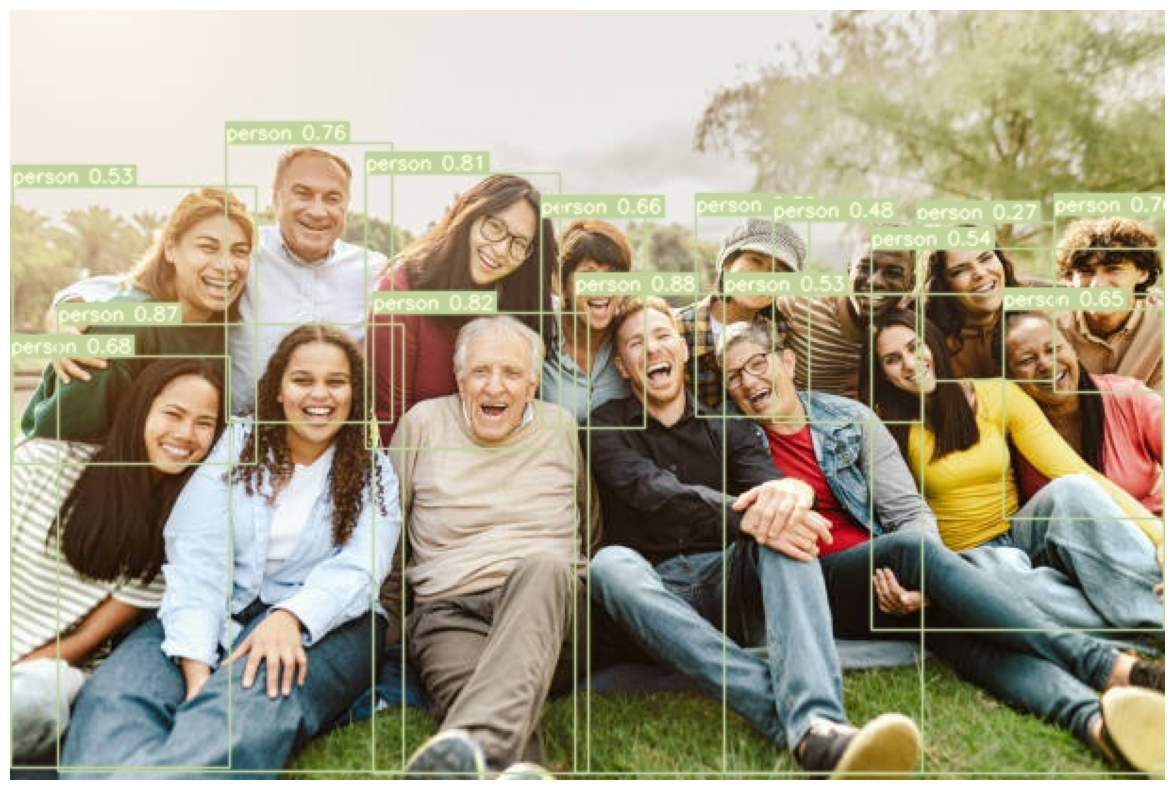

In [27]:
image_view("runs/detect/exp/1.jpg")

### 3.2 Using the yolov7-w6-pose model

In [28]:
YOLOV7_MODEL[7]

'https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-w6-pose.pt'

In [29]:
get_yolov7_model(7)

Done

-rw-r--r-- 1 root root  13M Nov 14 17:11 yolov7-tiny.pt
-rw-r--r-- 1 root root 154M Nov 14 17:13 yolov7-w6-pose.pt


In [30]:
YOLOV7MODEL = os.path.basename(YOLOV7_MODEL[7])

try:
    print("Loading the model...")
    model, yolomodel = loading_yolov7_model(yolomodel=YOLOV7MODEL)
    print("Using the", YOLOV7MODEL, "model")
    print("Done")

except:
    print("[Error] Cannot load the model", YOLOV7MODEL)

  model = torch.load(yolomodel, map_location=device)['model']



Loading the model...
Loading model: yolov7-w6-pose.pt
Using the yolov7-w6-pose.pt model
Done


### 3.3 Visualize The Model

In [44]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=fc7a0155cbb3a8f8c8c2249a27e6b01b750451b9c41686510a6eef935d0b9cb2
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


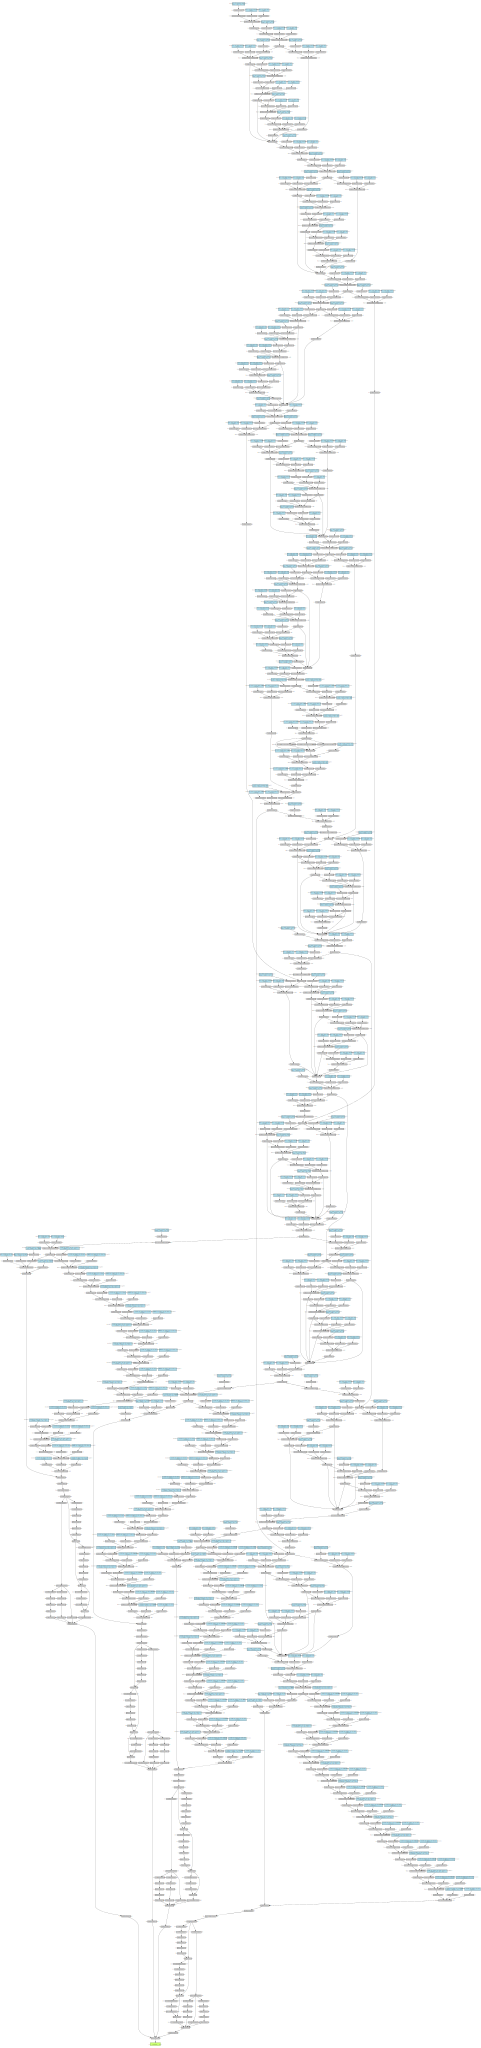

In [45]:
from torchviz import make_dot

x = torch.randn(1, 3, 640, 640).to(device)
y = model(x)

dot = make_dot(y[0], params=dict(model.named_parameters()))

dot

In [33]:
# dot.render("yolov7_model_graph")

# from google.colab import files
# files.download('yolov7_model_graph.pdf')

### 3.4 Testing the Pose - model on a image

In [34]:
imagefile = "/content/drive/MyDrive/Colab Notebooks/MV/Project/1.jpg"

output, image = running_inference(cv2.imread(imagefile))
pose_image = draw_keypoints(output, image, confidence=0.25, threshold=0.65)

plt.figure(figsize=(30, 15))
plt.axis("off")
plt.imshow(pose_image)

Output hidden; open in https://colab.research.google.com to view.

## 4. Analysing a video with yolov7-w6-pose

In [35]:
def yoloV7_pose_video(videofile, confidence=0.25, threshold=0.65):

    start = time.time()
    video = VideoFileClip(videofile)

    duration = video.duration
    fps = round(video.fps)
    nbframes = round(duration * fps)

    print("Processing video:", videofile, "using confidence min =", confidence,
          "and threshold =", threshold)
    print("\nVideo duration =", duration, "seconds")
    print("FPS =", fps)
    print("Total number of frames =", nbframes, "\n")

    capture = cv2.VideoCapture(videofile)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    outputvideofile = "../results/result_" + os.path.basename(videofile)
    outvideo = cv2.VideoWriter(outputvideofile, fourcc, 30.0,
                               (int(capture.get(3)), int(capture.get(4))))
    idx = 1

    while capture.isOpened():
        (ret, frame) = capture.read()

        if ret == True:
            if idx % fps == 1:
                nbremainframes = nbframes - idx
                pctdone = round(idx / nbframes * 100)
                print("Processed frames =", f"{idx:06}",
                      "| Number of remaining frames:", f"{nbremainframes:06}",
                      "| Done:", pctdone, "%")

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            output, frame = running_inference(frame)
            frame = draw_keypoints(output, frame, confidence, threshold)
            frame = cv2.resize(frame,
                               (int(capture.get(3)), int(capture.get(4))))

            cv2.imwrite(
                "results/videoframe_" + os.path.basename(videofile) + '_' +
                str(f"{idx:06}.jpg"), frame)
            outvideo.write(frame)

        else:
            break

        idx += 1

    processed_time = round(time.time() - start)
    time_per_frame = round(processed_time / (idx - 1), 2)
    print("\nDone in", processed_time, "seconds")
    print("Time per frame =", time_per_frame, "seconds")
    print("\nSaved video:", outputvideofile)

    capture.release()
    outvideo.release()

    return outputvideofile

### 4.1 Test 1

In [40]:
football_vid = "/content/drive/MyDrive/Colab Notebooks/MV/Project/4446327-hd_1920_1080_30fps.mp4"
football_video = yoloV7_pose_video(football_vid)

Processing video: /content/drive/MyDrive/Colab Notebooks/MV/Project/4446327-hd_1920_1080_30fps.mp4 using confidence min = 0.25 and threshold = 0.65

Video duration = 4.71 seconds
FPS = 30
Total number of frames = 141 

Processed frames = 000001 | Number of remaining frames: 000140 | Done: 1 %
Processed frames = 000031 | Number of remaining frames: 000110 | Done: 22 %
Processed frames = 000061 | Number of remaining frames: 000080 | Done: 43 %
Processed frames = 000091 | Number of remaining frames: 000050 | Done: 65 %
Processed frames = 000121 | Number of remaining frames: 000020 | Done: 86 %

Done in 468 seconds
Time per frame = 3.32 seconds

Saved video: ../results/result_4446327-hd_1920_1080_30fps.mp4


In [41]:
VideoFileClip(football_video).ipython_display(width=640)

Output hidden; open in https://colab.research.google.com to view.

### 4.2 Test 2

In [46]:
tennis_vid = "/content/drive/MyDrive/Colab Notebooks/MV/Project/6237084-hd_1080_1920_30fps.mp4"
tennis_video = yoloV7_pose_video(tennis_vid)

Processing video: /content/drive/MyDrive/Colab Notebooks/MV/Project/6237084-hd_1080_1920_30fps.mp4 using confidence min = 0.25 and threshold = 0.65

Video duration = 12.2 seconds
FPS = 30
Total number of frames = 366 

Processed frames = 000001 | Number of remaining frames: 000365 | Done: 0 %
Processed frames = 000031 | Number of remaining frames: 000335 | Done: 8 %
Processed frames = 000061 | Number of remaining frames: 000305 | Done: 17 %
Processed frames = 000091 | Number of remaining frames: 000275 | Done: 25 %
Processed frames = 000121 | Number of remaining frames: 000245 | Done: 33 %
Processed frames = 000151 | Number of remaining frames: 000215 | Done: 41 %
Processed frames = 000181 | Number of remaining frames: 000185 | Done: 49 %
Processed frames = 000211 | Number of remaining frames: 000155 | Done: 58 %
Processed frames = 000241 | Number of remaining frames: 000125 | Done: 66 %
Processed frames = 000271 | Number of remaining frames: 000095 | Done: 74 %
Processed frames = 0003

In [ ]:
VideoFileClip(tennis_video).ipython_display(width=640)

## Aplication Of Kalman Fliters

In [ ]:
!pip install mediapipe
!pip install filterpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=163c864f0ebd19b730d7966a050a2bd1e0e1ca4f6329b0577a231f19727233d5
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


## Pre - Processing & Applying the Kalman Filetrs

In [ ]:
import cv2
import numpy as np
from filterpy.kalman import KalmanFilter
import mediapipe as mp

def process_video_with_kalman(input_video_path, output_video_path):
    cap = cv2.VideoCapture(input_video_path)
    frame_width, frame_height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    fgbg = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)
    mp_pose = mp.solutions.pose.Pose()
    kalman_filters = {}

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        fgmask = fgbg.apply(frame)
        denoised = cv2.GaussianBlur(fgmask, (5, 5), 0)

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = mp_pose.process(frame_rgb)

        if results.pose_landmarks:
            for i, lm in enumerate(results.pose_landmarks.landmark):
                cx, cy = int(lm.x * frame_width), int(lm.y * frame_height)
                if i not in kalman_filters:
                    kf = KalmanFilter(dim_x=4, dim_z=2)
                    kf.x = np.array([cx, cy, 0, 0])
                    kf.F = np.array([[1, 0, 1, 0],
                                     [0, 1, 0, 1],
                                     [0, 0, 1, 0],
                                     [0, 0, 0, 1]])
                    kf.H = np.array([[1, 0, 0, 0],
                                     [0, 1, 0, 0]])
                    kf.P *= 1000
                    kf.R *= 10
                    kalman_filters[i] = kf

                kf = kalman_filters[i]
                kf.predict()
                kf.update(np.array([cx, cy]))
                cx, cy = int(kf.x[0]), int(kf.x[1])
                cv2.circle(frame, (cx, cy), 5, (0, 255, 0), -1)

        out.write(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [ ]:
def yoloV7_pose_video(videofile, confidence=0.25, threshold=0.65):

    start = time.time()
    video = VideoFileClip(videofile)

    duration = video.duration
    fps = round(video.fps)
    nbframes = round(duration * fps)

    print("Processing video:", videofile, "using confidence min =", confidence,
          "and threshold =", threshold)
    print("\nVideo duration =", duration, "seconds")
    print("FPS =", fps)
    print("Total number of frames =", nbframes, "\n")

    capture = cv2.VideoCapture(videofile)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    outputvideofile = "../results/result_" + os.path.basename(videofile)
    outvideo = cv2.VideoWriter(outputvideofile, fourcc, 30.0,
                               (int(capture.get(3)), int(capture.get(4))))
    idx = 1

    while capture.isOpened():
        (ret, frame) = capture.read()

        if ret == True:
            if idx % fps == 1:
                nbremainframes = nbframes - idx
                pctdone = round(idx / nbframes * 100)
                print("Processed frames =", f"{idx:06}",
                      "| Number of remaining frames:", f"{nbremainframes:06}",
                      "| Done:", pctdone, "%")

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            output, frame = running_inference(frame)
            frame = draw_keypoints(output, frame, confidence, threshold)
            frame = cv2.resize(frame,
                               (int(capture.get(3)), int(capture.get(4))))

            cv2.imwrite(
                "results/videoframe_" + os.path.basename(videofile) + '_' +
                str(f"{idx:06}.jpg"), frame)
            outvideo.write(frame)

        else:
            break

        idx += 1

    processed_time = round(time.time() - start)
    time_per_frame = round(processed_time / (idx - 1), 2)
    print("\nDone in", processed_time, "seconds")
    print("Time per frame =", time_per_frame, "seconds")
    print("\nSaved video:", outputvideofile)

    capture.release()
    outvideo.release()

    return outputvideofile

### 5.1 Test1

In [ ]:
football_vid = "/content/drive/MyDrive/Colab Notebooks/MV/Project/4446327-hd_1920_1080_30fps.mp4"
vid = "/content/drive/MyDrive/Colab Notebooks/MV/Project/output_videot1.mp4"
process_video_with_kalman(football_vid, vid )
football_video = yoloV7_pose_video(vid)

Processing video: /content/drive/MyDrive/Colab Notebooks/MV/Project/output_videot1.mp4 using confidence min = 0.25 and threshold = 0.65

Video duration = 4.71 seconds
FPS = 30
Total number of frames = 141 

Processed frames = 000001 | Number of remaining frames: 000140 | Done: 1 %
Processed frames = 000031 | Number of remaining frames: 000110 | Done: 22 %
Processed frames = 000061 | Number of remaining frames: 000080 | Done: 43 %
Processed frames = 000091 | Number of remaining frames: 000050 | Done: 65 %
Processed frames = 000121 | Number of remaining frames: 000020 | Done: 86 %

Done in 463 seconds
Time per frame = 3.28 seconds

Saved video: ../results/result_output_videot1.mp4


In [ ]:
path = "/content/results/result_output_videot1.mp4"
VideoFileClip(path).ipython_display(width=640)

### 5.2 Test 2

In [ ]:
a2_vid = "/content/drive/MyDrive/Colab Notebooks/MV/Project/6237084-hd_1080_1920_30fps.mp4"
vid_2 = "/content/drive/MyDrive/Colab Notebooks/MV/Project/output_videot2.mp4"
process_video_with_kalman(a2_vid, vid_2 )
a2_video = yoloV7_pose_video(vid_2)

Processing video: /content/drive/MyDrive/Colab Notebooks/MV/Project/output_videot2.mp4 using confidence min = 0.25 and threshold = 0.65

Video duration = 12.2 seconds
FPS = 30
Total number of frames = 366 

Processed frames = 000001 | Number of remaining frames: 000365 | Done: 0 %
Processed frames = 000031 | Number of remaining frames: 000335 | Done: 8 %
Processed frames = 000061 | Number of remaining frames: 000305 | Done: 17 %
Processed frames = 000091 | Number of remaining frames: 000275 | Done: 25 %
Processed frames = 000121 | Number of remaining frames: 000245 | Done: 33 %
Processed frames = 000151 | Number of remaining frames: 000215 | Done: 41 %
Processed frames = 000181 | Number of remaining frames: 000185 | Done: 49 %
Processed frames = 000211 | Number of remaining frames: 000155 | Done: 58 %
Processed frames = 000241 | Number of remaining frames: 000125 | Done: 66 %
Processed frames = 000271 | Number of remaining frames: 000095 | Done: 74 %
Processed frames = 000301 | Number 

In [ ]:
VideoFileClip(a2_video).ipython_display(width=640)